### 0.2 - PACOTES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 0.3 - CONFIGURAÇÕES 

In [2]:
# Configurar opções de exibição
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### 0.4 - FUNÇÕES

In [3]:
def analise_descritiva(numerical_df):
    """
    Realiza uma análise descritiva básica em um DataFrame contendo dados numéricos.

    Parâmetros:
        numerical_df (pandas.DataFrame): DataFrame contendo apenas dados numéricos.
        
    Retorna:
        pandas.DataFrame: Um DataFrame com as seguintes estatísticas descritivas para cada coluna:
            - Atributos: Nomes das colunas do DataFrame de entrada.
            - Media: Média dos valores em cada coluna.
            - Mediana: Mediana dos valores em cada coluna.
            - DesvioPadrao: Desvio padrão dos valores em cada coluna.
            - Min: Valor mínimo em cada coluna.
            - Q1: Primeiro quartil em cada coluna.
            - P10: Décimo percentil em cada coluna.
            - P90: Nonagésimo percentil em cada coluna.
            - Q3: Terceiro quartil em cada coluna.
            - Max: Valor máximo em cada coluna.
            - Range: Amplitude dos valores em cada coluna (diferença entre máximo e mínimo).
            - Assimetria: Medida de assimetria dos valores em cada coluna.
            - Curtose: Medida de curtose dos valores em cada coluna.
    """
    
    ct1 = pd.DataFrame(numerical_df.apply(np.mean)).T
    ct2 = pd.DataFrame(numerical_df.apply(np.median)).T
    ct3 = pd.DataFrame(numerical_df.apply(lambda x: x.quantile(0.25))).T  # Q1
    ct4 = pd.DataFrame(numerical_df.apply(lambda x: x.quantile(0.75))).T  # Q3
    ct5 = pd.DataFrame(numerical_df.apply(lambda x: x.quantile(0.10))).T  # P10
    ct6 = pd.DataFrame(numerical_df.apply(lambda x: x.quantile(0.90))).T  # P90

    d1 = pd.DataFrame(numerical_df.apply(np.std)).T
    d2 = pd.DataFrame(numerical_df.apply(min)).T
    d3 = pd.DataFrame(numerical_df.apply(max)).T
    d4 = pd.DataFrame(numerical_df.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(numerical_df.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(numerical_df.apply(lambda x: x.kurtosis())).T

    m = pd.concat([ct1, ct2, ct3, ct4, ct5, ct6, d1, d2, d3, d4, d5, d6]).T.reset_index()
    m.columns = ["Atributos", "Media", "Mediana", "Q1", "Q3", "P10", "P90", "DesvioPadrao", "Min", "Max", "Range", "Assimetria", "Curtose"]

    return m

### 0.5 - LEITURA E BREVE COMPREENSÃO DO DATASET

In [4]:
# Definindo tipos na mão, para consumir menos memória
df = pd.read_csv('Customers.csv', dtype={
    'CustomerID':'category',
    'Gender':'category',
    'Age':np.dtype('int32'),
    'Profession':'category',
    'Work Experience': np.dtype('int32'),
    'Family Size': np.dtype('int32')
})

df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              2000 non-null   category
 1   Gender                  2000 non-null   category
 2   Age                     2000 non-null   int32   
 3   Annual Income ($)       2000 non-null   int64   
 4   Spending Score (1-100)  2000 non-null   int64   
 5   Profession              1965 non-null   category
 6   Work Experience         2000 non-null   int32   
 7   Family Size             2000 non-null   int32   
dtypes: category(3), int32(3), int64(2)
memory usage: 143.3 KB


In [6]:
df.shape

(2000, 8)

In [7]:
df.dtypes

CustomerID                category
Gender                    category
Age                          int32
Annual Income ($)            int64
Spending Score (1-100)       int64
Profession                category
Work Experience              int32
Family Size                  int32
dtype: object

In [8]:
# Deixando o nome das colunas em lowercase
df.columns = [col.lower() for col in df.columns]

In [9]:
df.columns = ['customerid', 'gender', 'age', 'annual_income',
       'spending_score', 'profession', 'work_experience',
       'family_size']

In [10]:
# Verificando percentual de valores nulos por coluna
df.isna().sum() / len(df) * 100

customerid         0.00
gender             0.00
age                0.00
annual_income      0.00
spending_score     0.00
profession         1.75
work_experience    0.00
family_size        0.00
dtype: float64

### 1.0 - ANÁLISE

In [11]:
df['customerid'].nunique()

2000

#### 1.1 - GÊNERO

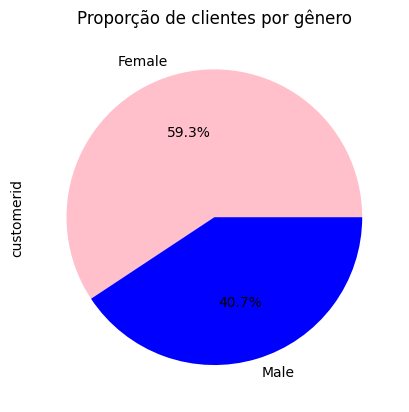

In [12]:
gender_series = df.groupby('gender', observed=False)['customerid'].nunique()

colors = ['pink', 'blue']
ax = gender_series.plot(kind="pie", colors=colors, autopct='%1.1f%%')
plt.title('Proporção de clientes por gênero')
plt.show()



#### 1.2 - IDADE

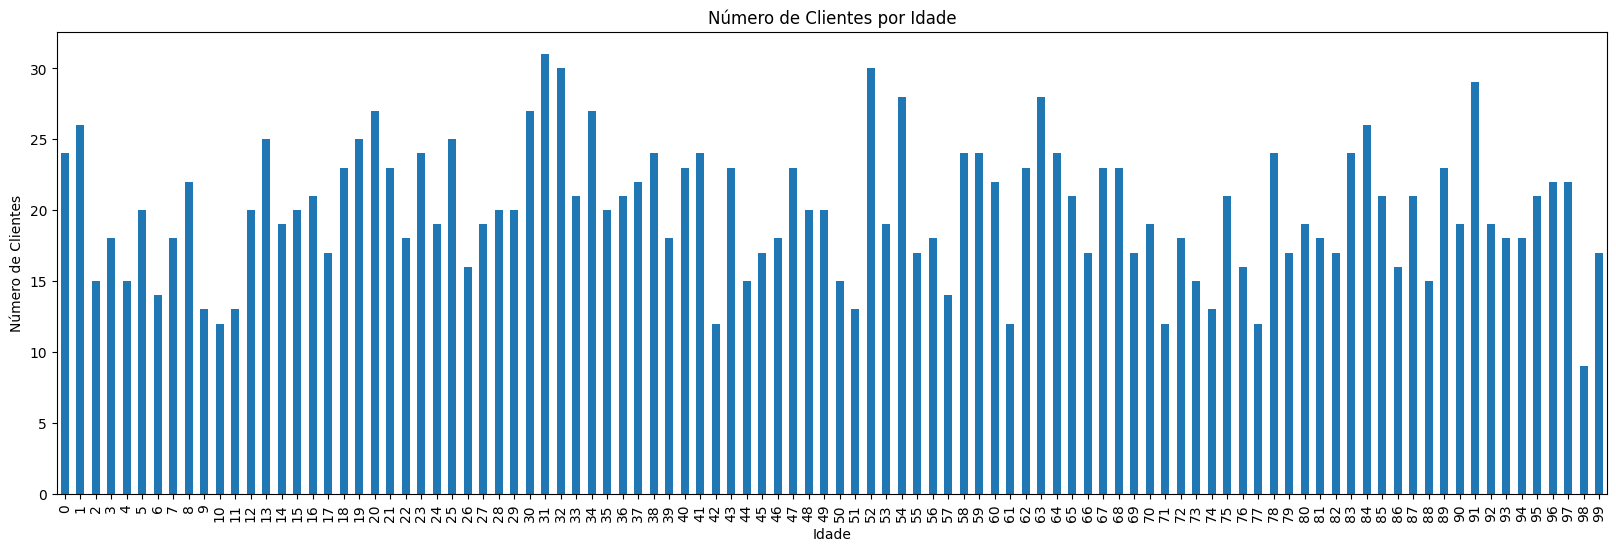

In [13]:
age_series = df.groupby('age', observed=False)['customerid'].nunique()

plt.figure(figsize=(20, 6))

age_series.plot(kind="bar")
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')
plt.title('Número de Clientes por Idade')

plt.show()

In [35]:
## Participação da idade específica no dataset inteiro, em percentual.
(age_series / len(df) * 100).sort_values(ascending=False)

age
31    1.55
32    1.50
52    1.50
91    1.45
63    1.40
54    1.40
20    1.35
34    1.35
30    1.35
1     1.30
84    1.30
25    1.25
13    1.25
19    1.25
38    1.20
23    1.20
0     1.20
83    1.20
59    1.20
78    1.20
64    1.20
41    1.20
58    1.20
21    1.15
18    1.15
89    1.15
43    1.15
67    1.15
68    1.15
40    1.15
62    1.15
47    1.15
60    1.10
96    1.10
8     1.10
37    1.10
97    1.10
85    1.05
65    1.05
87    1.05
36    1.05
33    1.05
95    1.05
75    1.05
16    1.05
5     1.00
35    1.00
29    1.00
28    1.00
48    1.00
49    1.00
12    1.00
15    1.00
24    0.95
92    0.95
14    0.95
80    0.95
70    0.95
53    0.95
90    0.95
27    0.95
7     0.90
3     0.90
39    0.90
72    0.90
94    0.90
93    0.90
81    0.90
56    0.90
22    0.90
46    0.90
79    0.85
82    0.85
99    0.85
69    0.85
66    0.85
17    0.85
55    0.85
45    0.85
76    0.80
26    0.80
86    0.80
44    0.75
73    0.75
2     0.75
4     0.75
88    0.75
50    0.75
57    0.70
6     0.70
51    

As idades estão bem divididas entre 0 e 99 anos. Nenhuma idade chega a sequer 2% do dataset

#### 1.3 - PROFISSÕES

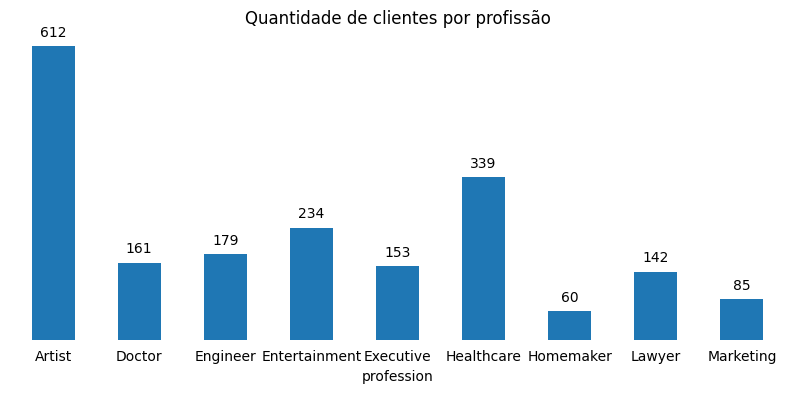

In [15]:
profession_series = df.groupby('profession', observed=False)['customerid'].nunique()

plt.figure(figsize=(10, 4))
plt.title('Quantidade de clientes por profissão')
ax = profession_series.plot(kind='bar')

# Adicionar rótulos de dados no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Remover poluições visuais
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Rotacionar os rótulos do eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False);

### 1.4 - Análise Descritiva das Variáveis Numéricas

In [16]:
num_vars = df.select_dtypes(include=['int32', 'int64'])

analise_descritiva(num_vars)

,Atributos,Media,Mediana,Q1,Q3,P10,P90,DesvioPadrao,Min,Max,Range,Assimetria,Curtose
0,age,48.9600,48.0,25.0,73.00,11.0,89.0,28.422639,0.0,99.0,99.0,0.049222,-1.168926
1,annual_income,110731.8215,110045.0,74572.0,149092.75,54251.9,173051.4,45728.100374,0.0,189974.0,189974.0,-0.116491,-0.843132
2,spending_score,50.9625,50.0,28.0,75.00,12.9,90.0,27.927676,0.0,100.0,100.0,0.004555,-1.100732
3,work_experience,4.1025,3.0,1.0,7.00,0.0,9.0,3.921224,0.0,17.0,17.0,0.683718,-0.466591
4,family_size,3.7685,4.0,2.0,5.00,1.0,7.0,1.970256,1.0,9.0,8.0,0.199263,-1.162611


O resumo estatístico mostra que há notáveis divergências de renda. Isso pode ser interessante para guiar os próximos passos da análise.

#### 1.5 - Correlação das variáveis numéricas

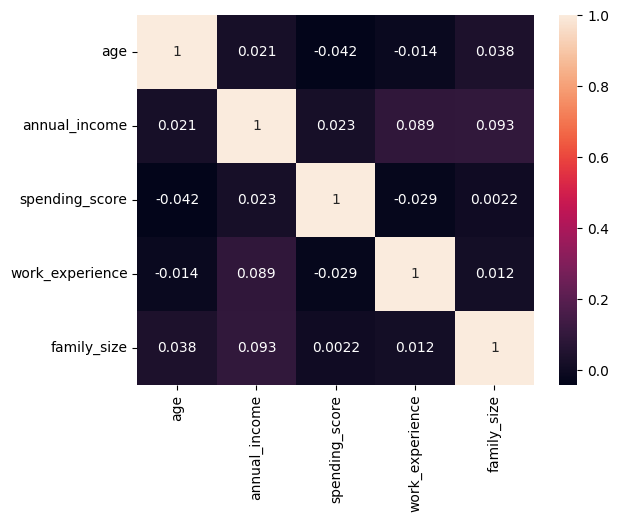

In [17]:
# Correlação
sns.heatmap(num_vars.corr(), annot=True);

#### 1.6 - Distribuição das variáveis numéricas (BoxPlot) 

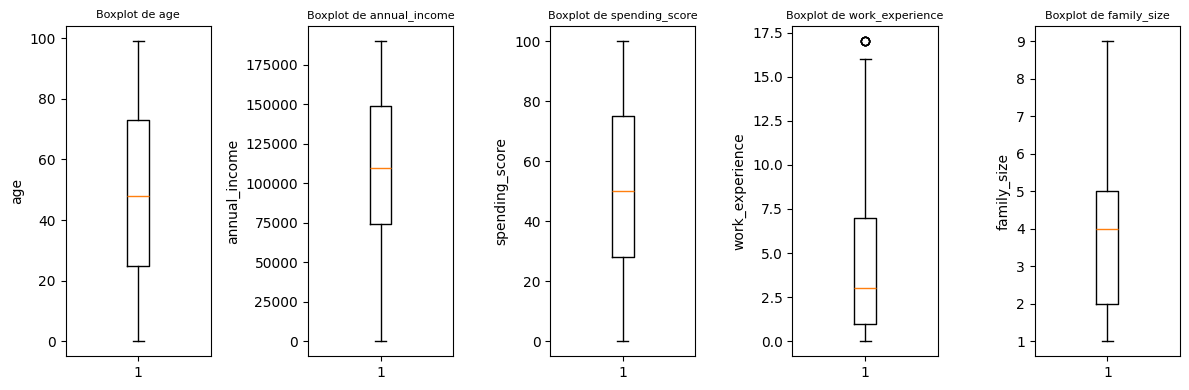

In [18]:
# Define o número de linhas e colunas necessárias para o subplot
num_cols = 5
num_rows = 1

# Cria o grid de subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4))

# Loop para plotar os boxplots de cada variável numérica em um subplot
for i, col in enumerate(num_vars.columns):
    ax = axes[i]
    ax.boxplot(num_vars[col])
    ax.set_title(f'Boxplot de {col}', fontsize=8)
    ax.set_ylabel(col)

# Ajusta o layout para que não haja sobreposição de títulos
plt.tight_layout()

# Exibe o gráfico com todos os subplots
plt.show()


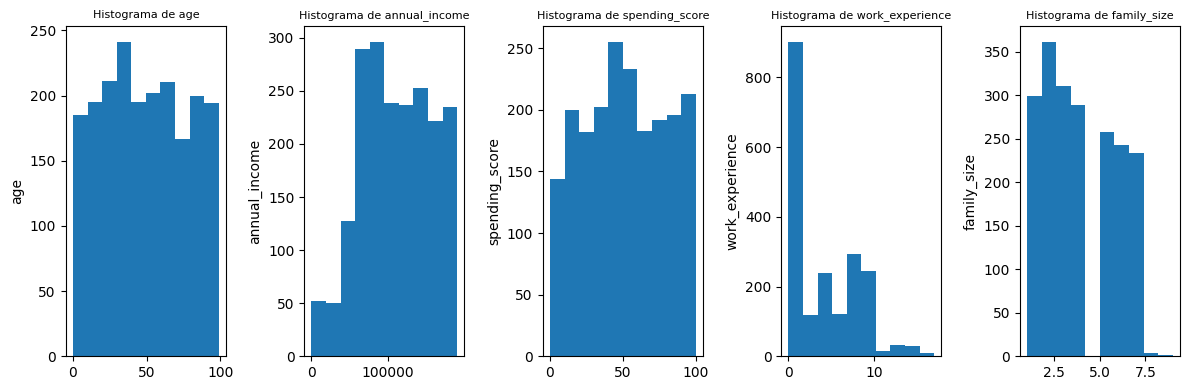

In [19]:
# Define o número de linhas e colunas necessárias para o subplot
num_cols = 5
num_rows = 1

# Cria o grid de subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4))

# Loop para plotar os boxplots de cada variável numérica em um subplot
for i, col in enumerate(num_vars.columns):
    ax = axes[i]
    ax.hist(num_vars[col])
    ax.set_title(f'Histograma de {col}', fontsize=8)
    ax.set_ylabel(col)

# Ajusta o layout para que não haja sobreposição de títulos
plt.tight_layout()

# Exibe o gráfico com todos os subplots
plt.show()


Embora as outras análises já tenham dado essa resposta, o histograma deixa gritante que a maioria dos clientes tem menos de 10 anos de experiência em suas profissões.

### 1.7 - Observando a média das variáveis numéricas por gênero

In [21]:
(
    df.groupby('gender', observed=False)
    .agg(
        {
            "customerid":"nunique",
            "age":"mean",
            "annual_income":"mean",
            "spending_score": "mean",
            "work_experience": "mean",
            "family_size": "mean"
        }
    ).rename(columns={"customerid":"qtd_cliente"})
)

,qtd_cliente,age,annual_income,spending_score,work_experience,family_size
gender,,,,,,
Female,1186,48.822934,110553.715008,50.974705,4.035413,3.768128
Male,814,49.159705,110991.323096,50.944717,4.200246,3.769042


Mulheres x Homens: <br>
As mulheres são: mais novas, têm menos tempo de trabalho, menor renda anual e maior score de gasto. Porém, neste dataset, as diferenças são bem pequenas.
        

### 1.8 - Média das variáveis numéricas por profissão

In [33]:
profession_groupped_df = (
    df.groupby('profession', observed=False)
    .agg(
        {
            "customerid":"nunique",   
            "age":"mean",
            "annual_income":"mean",
            "spending_score": "mean",
            "work_experience": "mean",
            "family_size": "mean"
        }
    ).rename(columns={"customerid":"qtd_cliente"})
)

profession_groupped_df

,qtd_cliente,age,annual_income,spending_score,work_experience,family_size
profession,,,,,,
Artist,612,49.004902,108776.580065,52.678105,4.215686,3.653595
Doctor,161,46.621118,111573.217391,51.900621,4.304348,3.670807
Engineer,179,55.094972,111161.240223,48.966480,3.955307,3.581006
Entertainment,234,51.162393,110650.333333,52.940171,3.500000,3.888889
Executive,153,46.601307,113770.130719,49.901961,4.248366,3.967320
Healthcare,339,47.843658,112574.041298,50.516224,4.002950,3.905605
Homemaker,60,45.366667,108758.616667,46.383333,6.133333,4.050000
Lawyer,142,47.753521,110995.838028,48.859155,3.528169,3.619718
Marketing,85,45.823529,107994.211765,48.717647,4.305882,3.729412


In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Número de linhas e colunas para os subplots
num_rows = 2
num_cols = 3

# Criar figura com um subplot para cada coluna
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=profession_groupped_df.columns)

# Adicionar um barplot para cada coluna do DataFrame
for i, column in enumerate(profession_groupped_df.columns, start=1):
    fig.add_trace(
        go.Bar(x=profession_groupped_df.index, y=profession_groupped_df[column], name=column),
        row=(i-1)//num_cols + 1,  # Calculando a linha correta
        col=(i-1)%num_cols + 1    # Calculando a coluna correta
    )

# Atualizar layout
fig.update_layout(height=600, width=1200, title_text="Métricas por Profissão", showlegend=False)
fig.show()


O plotly não renderiza no github, caso tenha interesse em ver o gráfico, procure o meu repositório em https://nbviewer.org/ <br>
<p>
A maior parte dos clientes são artistas <br>
Os engenheiros são os mais velhos <br>
As donas de casa são as que têm mais tempo de trabalho
</p>

### 1.9 COMPARANDO GÊNERO E PROFISSÃO

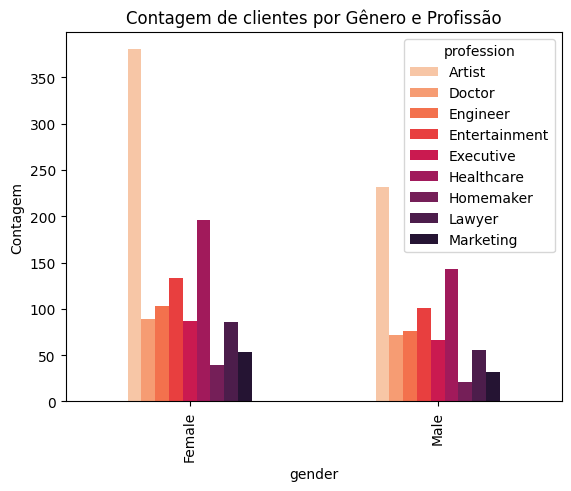

In [49]:
cross_tab = pd.crosstab(df['gender'], df['profession'])

import seaborn as sns

# Escolhendo uma paleta de cores do Seaborn
palette = sns.color_palette("rocket_r", len(cross_tab.columns))

# Gráfico de barras com a paleta do Seaborn
cross_tab.plot(kind='bar', stacked=False, color=palette)
plt.title("Contagem de clientes por Gênero e Profissão")
plt.ylabel("Contagem")
plt.show()
